# Basic classification in TensorFlow/Keras

Based on:
https://www.tensorflow.org/tutorials/keras/basic_classification
and
https://elitedatascience.com/keras-tutorial-deep-learning-in-python

## 0. Install TensorFlow and Keras

TensorFlow is an open source machine learning framework created by Google.
Keras is a high-level API to build and train models in TensorFlow used in this tutorial.

### 0.1. Install TensorFlow and Keras with Anaconda3:

pip install tensorflow
pip install keras

### 0.2. TensorFlow and Python3 compatibility issues

(As of November, 2018) Anaconda3 is supplied with Python 3.7, unfortunately Tensorflow is not ready yet for that, and TensorFlow installation would fail.
You should downgrade to Python 3.5 and then reinstall TensorFlow+Keras:

conda install python=3.5.0

pip install tensorflow
pip install keras

## 1. Prepare the workspace and obtain+preprocess MNIST data

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout, Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 1.15.0
Keras version: 2.2.4-tf


MNIST dataset: 70,000 images of decimal digits (0..9) in format 28x28:
![image.png](attachment:image.png)

In [4]:
# Import MNIST dataset split into 60,000 for training and 10,000 for testing
dset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
type(dset)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [0]:
alldata = dset.load_data()

In [7]:
type(alldata)

tuple

In [0]:
len(alldata), type(alldata[0])

(2, tuple)

In [0]:
type(train_images)

numpy.ndarray

In [8]:
train_images[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
train_images[0].shape

(28, 28)

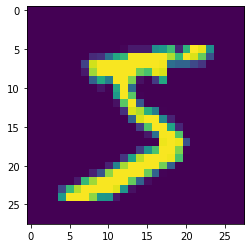

In [12]:
# Insight into imported data
num = 0
plt.imshow(train_images[num])

In [13]:
train_labels[0]

5

5
0
4
1
9


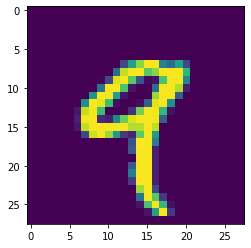

In [14]:
for n in range(5):
  plt.imshow(train_images[n])
  print(train_labels[n])

In [0]:
28*28

784

In [15]:
print(train_images[num])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [16]:
train_images[2][np.argmax(train_images[2], axis=1)]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [17]:
np.amax(train_images)

255

In [18]:
train_images.dtype

dtype('uint8')

In [19]:
np.amin(train_images)

0

In [0]:
train_images.dtype

dtype('uint8')

In [20]:
print(train_images[num].shape)

(28, 28)


In [0]:
print(train_labels[num])

5


In [0]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [0]:
# Categorize labels (not mandatory for our first simple network)
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)

In [0]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
print(train_labels[num], train_labels_cat[num])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
print(test_labels[0], test_labels_cat[0])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [24]:
np.max(test_images)

255

In [25]:
np.min(test_images)

0

In [26]:
np.amax(train_images)

255

In [0]:
# Preprocess image data
test_images_orig = test_images
train_images = train_images / 255
test_images = test_images / 255

In [28]:
np.max(train_images)

1.0

In [29]:
np.mean(train_images)

0.1306604762738429

In [30]:
print(train_images[num])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## 2. Create, train and run model

### 2.1. Create simple model

In [31]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### 2.2. Compile model

In [0]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

### 2.3. Train model

In [33]:
train_labels_cat[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [34]:
model.fit(train_images, train_labels_cat, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2627 - acc: 0.9250
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1139 - acc: 0.9664
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0767 - acc: 0.9770
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0567 - acc: 0.9827
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0440 - acc: 0.9864
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0352 - acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0287 - acc: 0.9908
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0228 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0192 - acc: 0.9942
Epoch 10/10
60000/60000 [==============================] - 

## 3. Test model

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(test_loss,test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0773 - acc: 0.9781
0.07725045687595557 0.9781


In [36]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [37]:
# Print accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9781


In [0]:
9769 + 231

10000

In [0]:
# Calculate prediction for test data
predictions = model.predict(test_images)

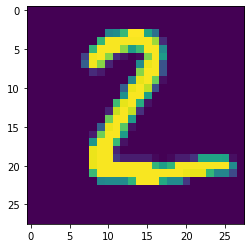

In [39]:
# Check what is predicted
num = 1
plt.imshow(test_images[num])

In [40]:
print(predictions[num])

[6.1673621e-15 4.2861330e-08 1.0000000e+00 3.6027674e-11 1.9407581e-22
 3.5903901e-12 2.4520787e-12 1.2666805e-17 1.1795705e-10 2.2478747e-17]


In [41]:
len(predictions)

10000

In [42]:
print(np.argmax(predictions[num]))

2


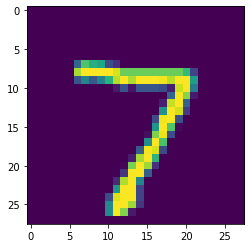

In [43]:
plt.imshow(test_images[0])

In [44]:
print(np.argmax(predictions[0]))

7


In [45]:
predictions[0]

array([8.5059408e-09, 2.9767337e-13, 3.1408163e-08, 2.4173214e-06,
       5.7372760e-14, 1.4273993e-10, 5.0038874e-16, 9.9999750e-01,
       2.5876881e-08, 4.1485197e-08], dtype=float32)

## 4. Visualize results

### 4.1. Define auxiliary functions

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 4.2. Plot prediction

In [0]:
# class names just for visualization
class_names = ['0-zero', '1-one', '2-two', '3-three', '4-four', 
               '5-five', '6-six', '7-seven', '8-eight', '9-nine']

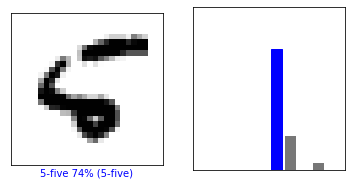

In [52]:
# visualization of prediction of one image
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

### 4.3. More visualization

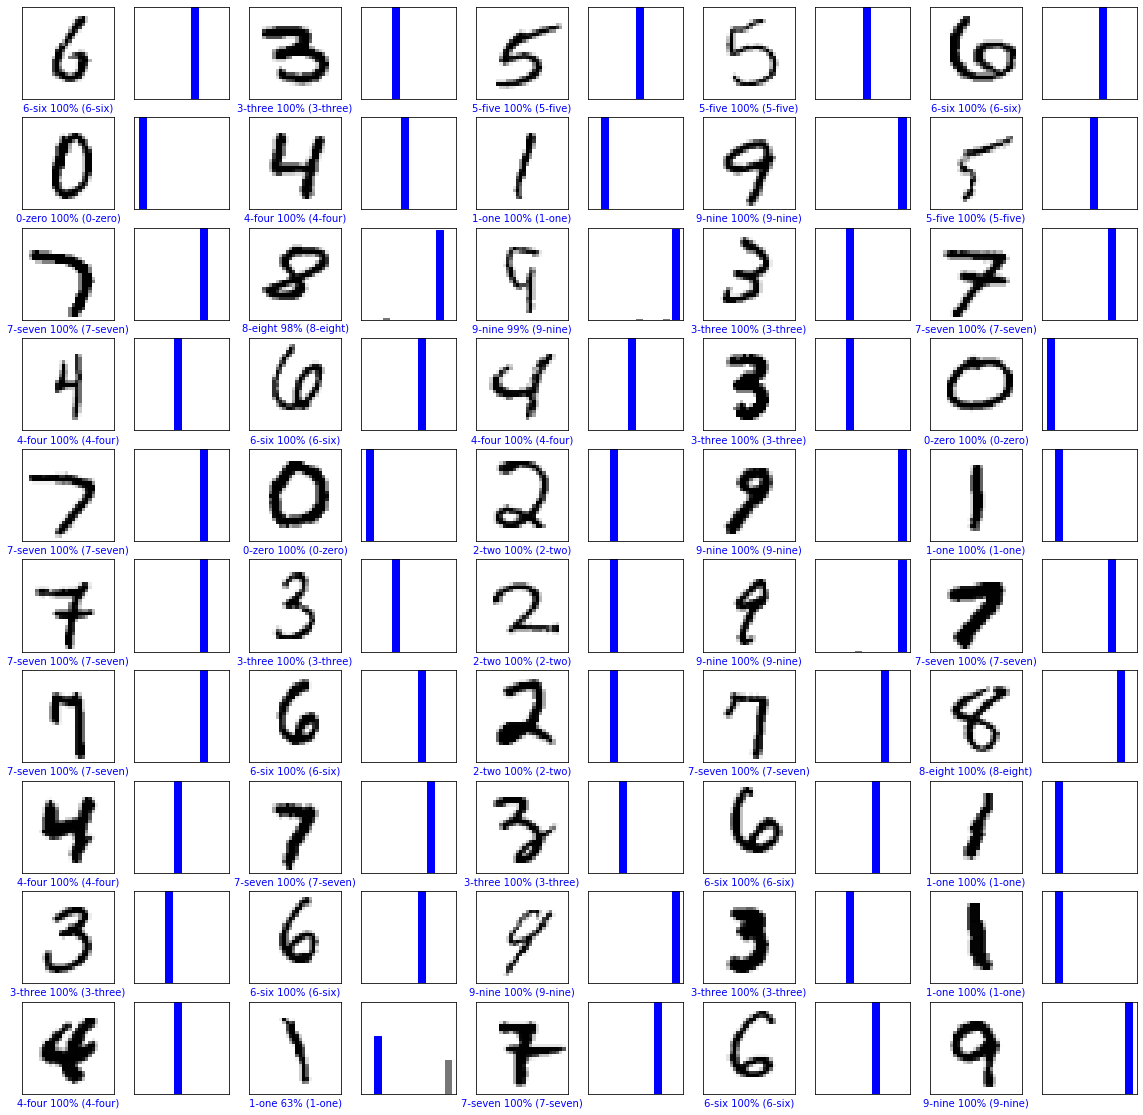

In [53]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+50, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+50, predictions, test_labels)

In [0]:
def plot50(offset=0, predictions=predictions, test_labels=test_labels, test_images_orig=test_images_orig):
  # Plot the first X test images, their predicted label, and the true label
  # Color correct predictions in blue, incorrect predictions in red
  num_rows = 10
  num_cols = 5
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i+offset, predictions, test_labels, test_images_orig)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i+offset, predictions, test_labels)

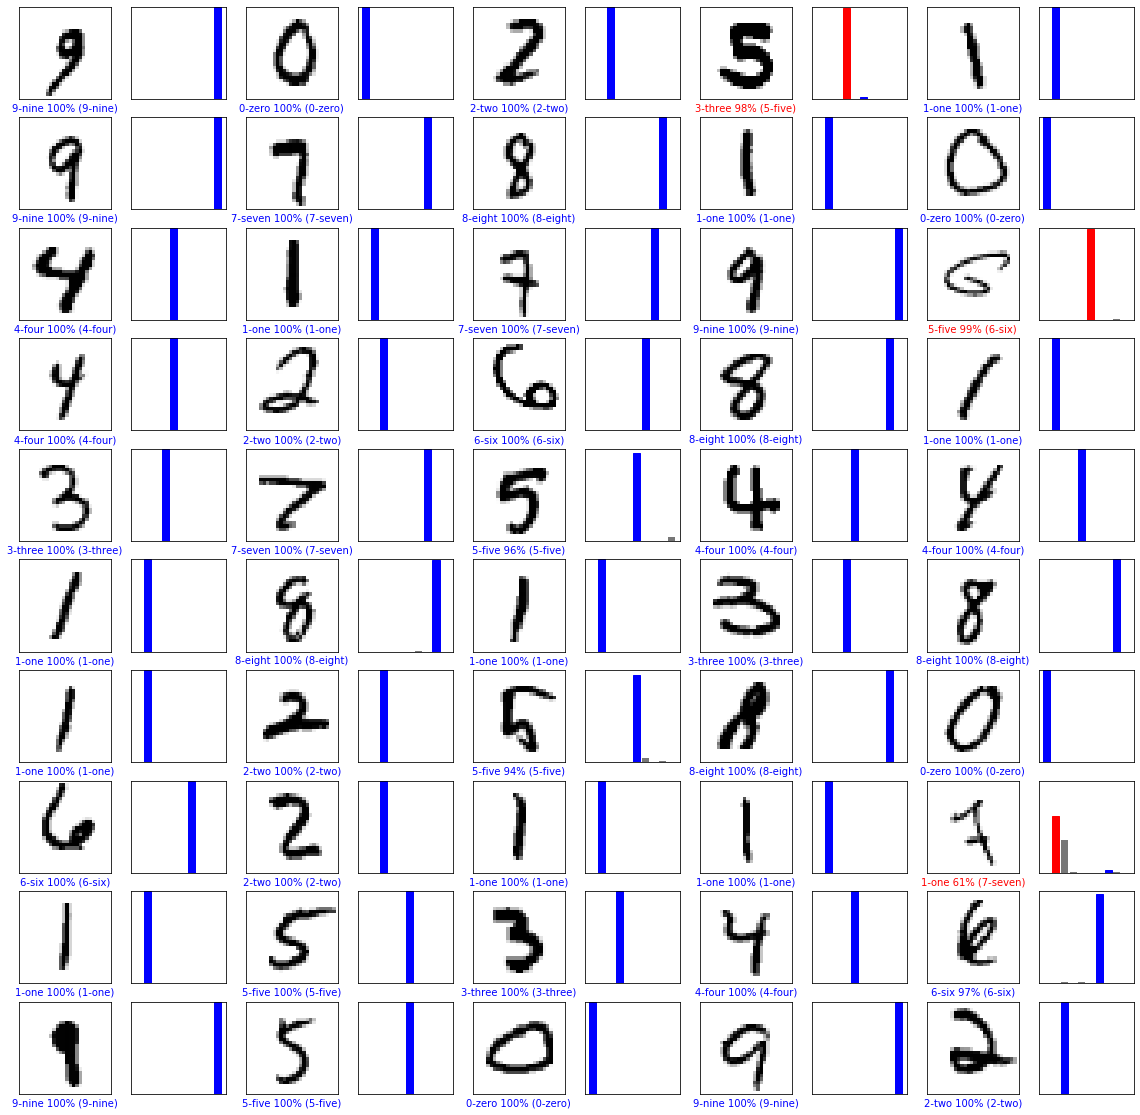

In [61]:
plot50(1000)

In [0]:
errors = []
# predictions, test_labels, test_images_orig
for predictions_array, answer, image in zip(predictions, test_labels, test_images_orig):
  predicted_label = np.argmax(predictions_array)
  if predicted_label != answer:
    errors.append((predictions_array, answer, image))

In [59]:
len(errors)

219

In [0]:
err_predictions_array = [el[0] for el in errors]
err_answers = [el[1] for el in errors]
err_images = [el[2] for el in errors]

In [64]:
errors[0]

(array([1.3897643e-09, 3.3291504e-05, 7.6842807e-06, 6.1229815e-07,
        4.7755557e-01, 3.3076731e-06, 6.7340053e-04, 1.6522508e-05,
        4.5440752e-06, 5.2170503e-01], dtype=float32),
 4,
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0, 104, 254,  82,   0,   0,   0,   0,   0, 

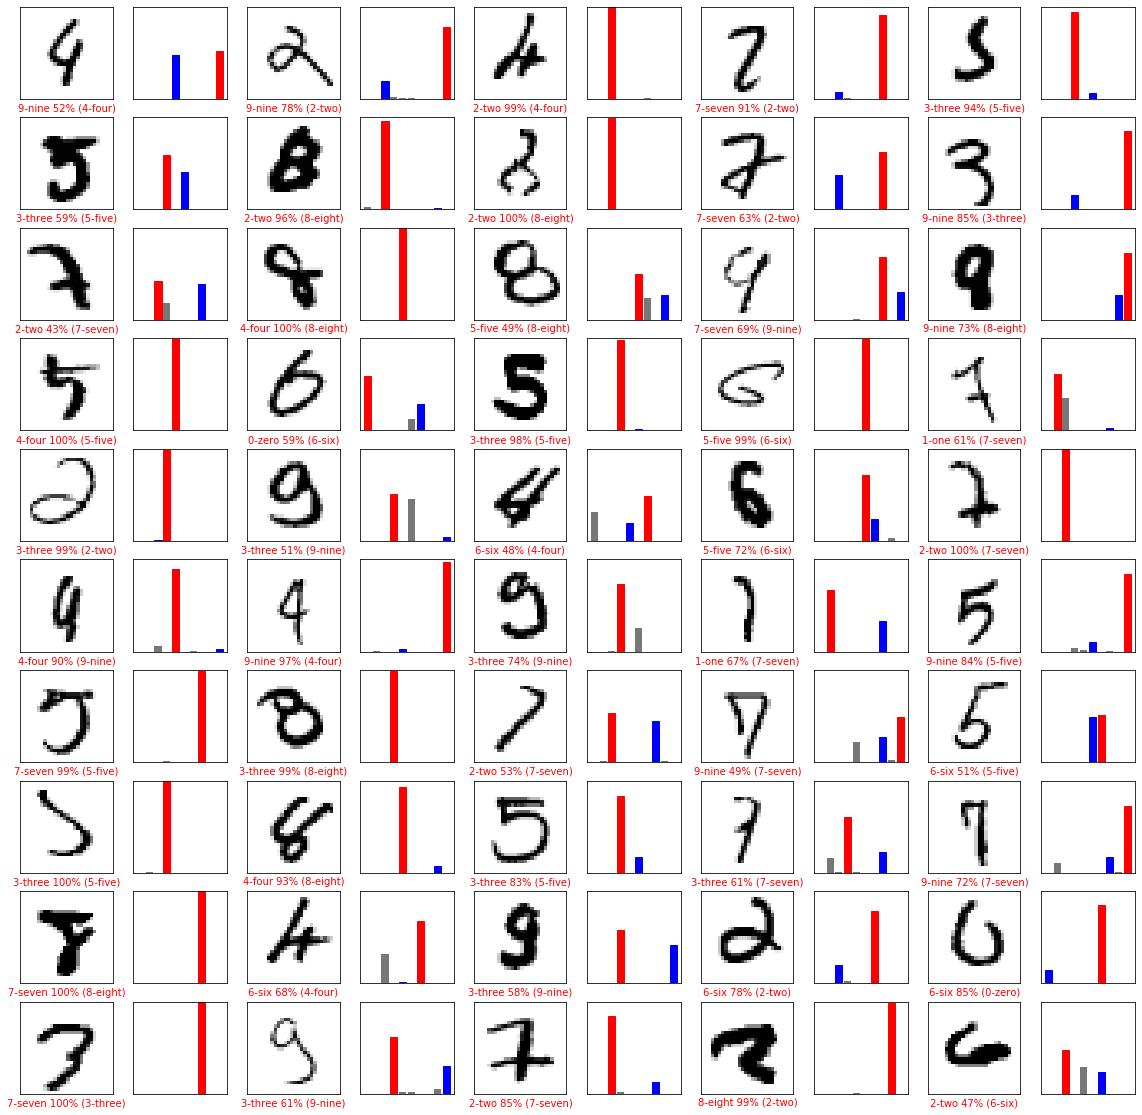

In [65]:
plot50(0, err_predictions_array, err_answers, err_images)

In [0]:
len(predictions), len(test_labels)

(10000, 10000)

In [0]:
predictions[0]

array([5.4874634e-09, 1.7241818e-10, 2.2928990e-07, 1.5958584e-03,
       3.7736744e-14, 9.5518962e-09, 5.0314239e-16, 9.9839514e-01,
       4.1882083e-07, 8.2588776e-06], dtype=float32)

In [0]:
np.argmax(predictions[0])

7

In [0]:
errors = []
for i, el in enumerate(predictions):
  if np.argmax(el) != test_labels[i]:
    errors.append(i)
len(errors)

231

In [0]:
errors[:5]

[115, 149, 187, 241, 247]

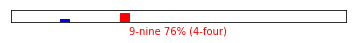

In [0]:
plot_image(115, predictions, test_labels, test_images_orig)
plot_value_array(115, predictions, test_labels)

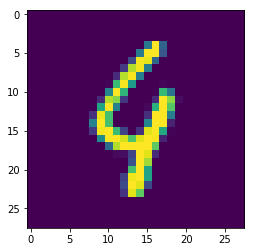

In [0]:
plt.imshow(test_images_orig[115])

## 5. Import, preprocess and train FASHION-MNIST

Fashion-MNIST is similar to MNIST but of clothings:
![image.png](attachment:image.png)

4423680/4422102 [==============================] - 0s 0us/step


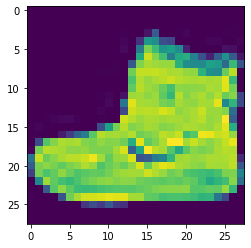

In [66]:
# Load data
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
num = 0
plt.imshow(train_images[num])

In [67]:
train_labels[0]

9

In [68]:
np.max(train_labels)

9

In [69]:
len(train_images)

60000

In [0]:
# Preprocess data
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)
test_images_orig = test_images
train_images = train_images / 255
test_images = test_images / 255

In [0]:
# Create and compile model
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [72]:
# Train model and obtain predictions
model.fit(train_images, train_labels_cat, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4925 - acc: 0.8266
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3736 - acc: 0.8651
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3333 - acc: 0.8782
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3121 - acc: 0.8864
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2960 - acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2799 - acc: 0.8967
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2673 - acc: 0.9000
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2577 - acc: 0.9038
Epoch 9/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2472 - acc: 0.9078
Epoch 10/10
10000/10000 [==============================] - 

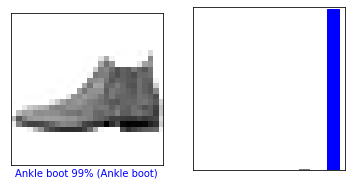

In [74]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

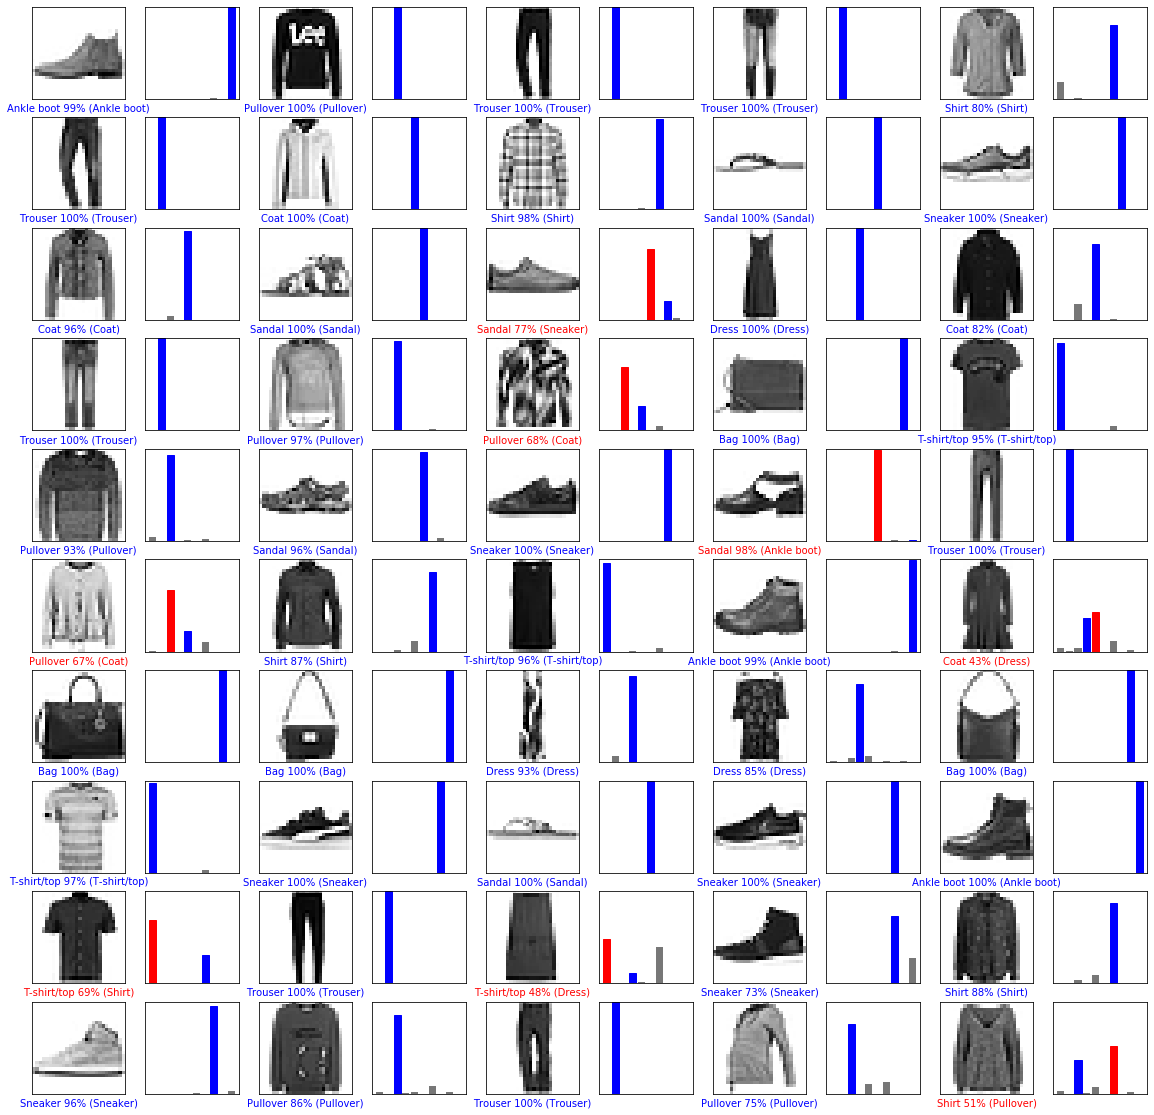

In [75]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [0]:
def findErrors(predictions, answers):
  errors = []
  for i, el in enumerate(predictions):
    if np.argmax(el) != answers[i]:
      errors.append(i)
  return errors

In [77]:
badClothes = findErrors(predictions, test_labels)
len(badClothes)

1184

In [78]:
badClothes[:20]

[12,
 17,
 23,
 25,
 29,
 40,
 42,
 49,
 66,
 67,
 68,
 103,
 107,
 135,
 147,
 150,
 151,
 153,
 182,
 222]

In [80]:
len(err_images)

1184

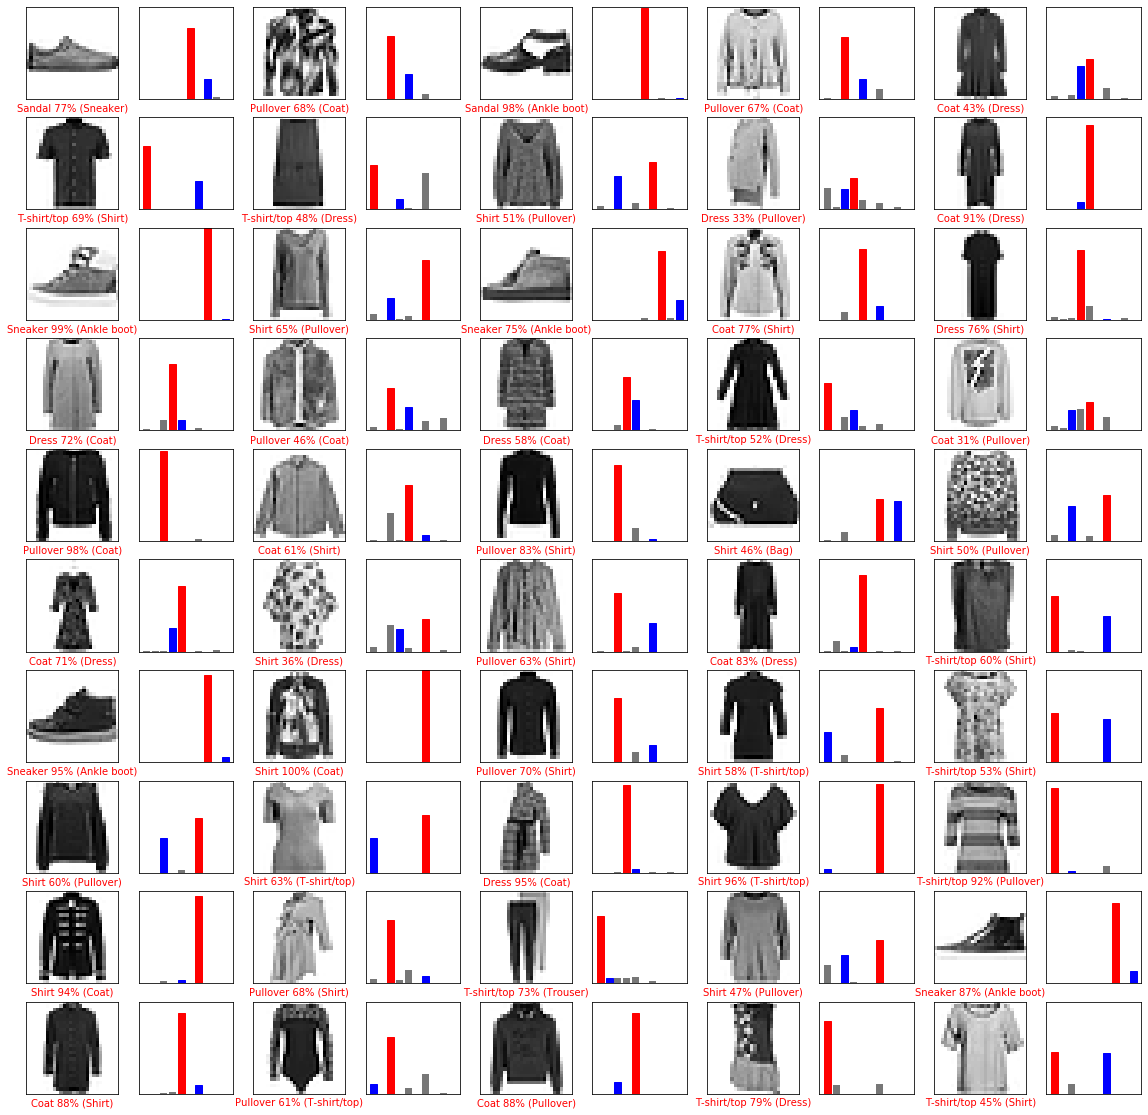

In [81]:
plot50(0, err_predictions_array, err_answers, err_images)

In [0]:
def getErrors(errorIndex=badClothes, predictions=predictions, test_labels=test_labels, test_images=test_images):
  err_predictions_array = [el for i,el in enumerate(predictions) if i in errorIndex]
  err_answers = [el for i,el in enumerate(test_labels) if i in errorIndex]
  err_images = [el for i,el in enumerate(test_images) if i in errorIndex]
  return err_predictions_array, err_answers, err_images
# for larger data set it would better to rewrite it with the following
# errors = []
# for i in badClothes:
#   errors.append((predictions[i], test_labels[i], test_images[i])

In [0]:
err_predictions_array, err_answers, err_images = getErrors()

## 6. Convolutional neural network

Convolutional neural networks are better suited for image recognition

In [0]:
# Load data
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
test_images_orig = test_images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)
train_images = train_images / 255
test_images = test_images / 255

In [83]:
np.max(train_images)

1.0

In [0]:
model = keras.Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [85]:
# Create and train model, and obtain predictions


model.fit(train_images, train_labels_cat, 
              batch_size=32, epochs=3, verbose=1)
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.4833 - acc: 0.8281
Epoch 2/3
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.3256 - acc: 0.8835
Epoch 3/3
10000/10000 [==============================] - 4s 413us/sample - loss: 0.2495 - acc: 0.9097
Test accuracy: 0.9097


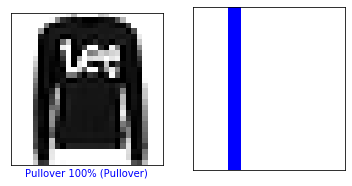

In [86]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

In [87]:
badclothes = findErrors(predictions, test_labels)
len(badclothes)

903

In [0]:
err_predictions_array, err_answers, err_images = getErrors(badclothes, predictions, test_labels, test_images_orig)

In [92]:
len(err_predictions_array)

903

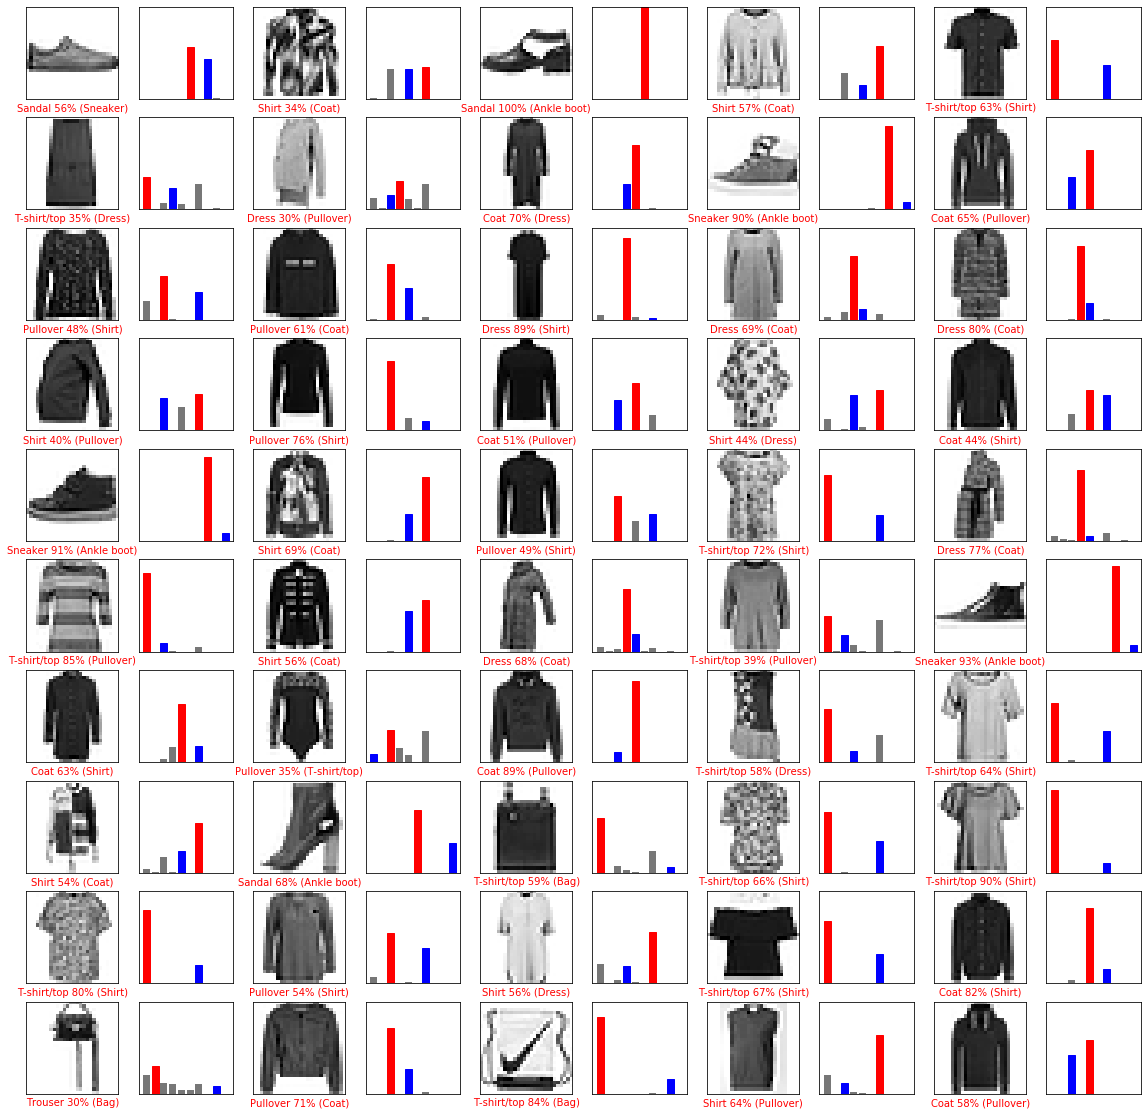

In [93]:
plot50(0, err_predictions_array, err_answers, err_images)

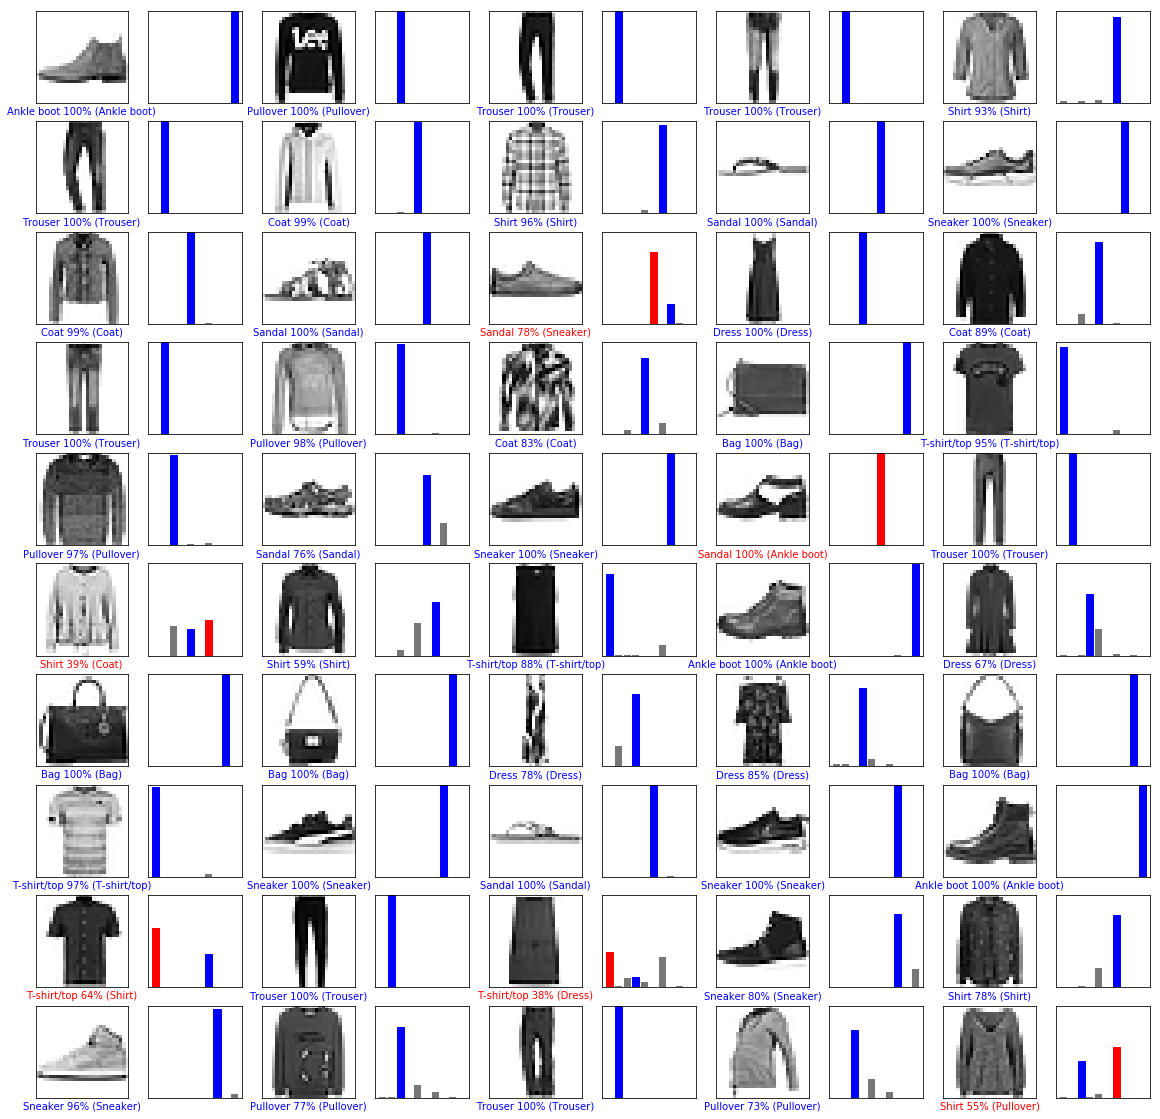

In [0]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)b
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [0]:
def plotFromIndex(index):
  # Plot the first X test images, their predicted label, and the true label
  # Color correct predictions in blue, incorrect predictions in red
  num_rows = 10
  num_cols = 5
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i, ndx in enumerate(index):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(ndx, predictions, test_labels, test_images_orig)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(ndx, predictions, test_labels)

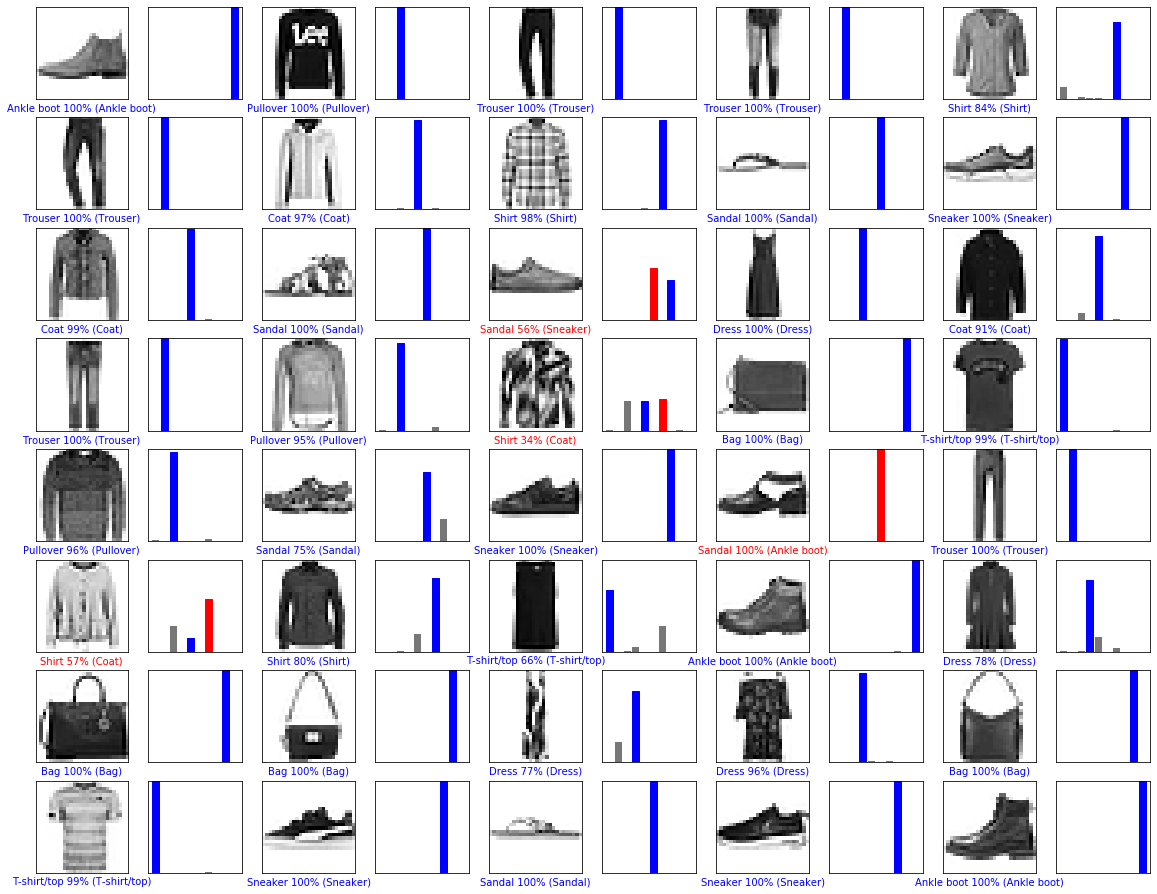

In [96]:
plotFromIndex(list(range(40)))

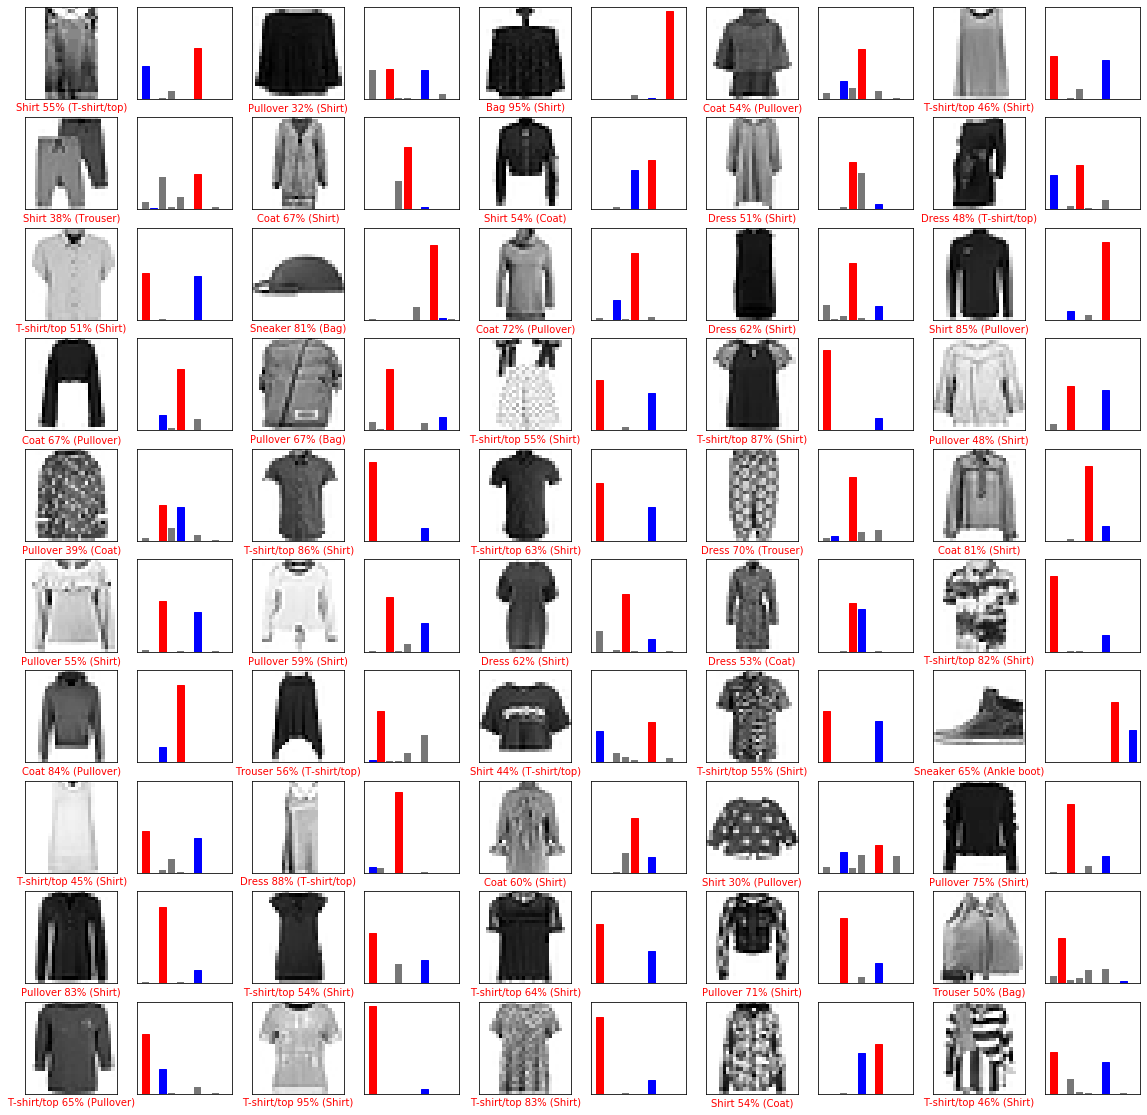

In [95]:
plotFromIndex(badclothes[-50:])